# Treeple tutorial for calculating S@98

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sktree.datasets import make_trunk_classification
from sktree.ensemble import HonestForestClassifier
from sktree.stats import build_hyppo_oob_forest
from treeple_tutorial_toolbox import Calculate_SA

## S@98

Sensitivity at 98% specificity (*S@98*) measures, namely, the true positive rate (*TPR*) when the false positive rate (*FPR*) is at 98%. 

With a binary class simulation as an example, this tutorial will show how to use `treeple` to calculate the statistic.

## Create a simulation with two gaussians

In [2]:
# create a binary class simulation with two gaussians
# 500 samples for each class, class zero is standard
# gaussian, and class one has a mean at one
X, y = make_trunk_classification(
    n_samples=1000,
    n_dim=1,
    mu_0=0,
    mu_1=1,
    n_informative=1,
    seed=1,
)

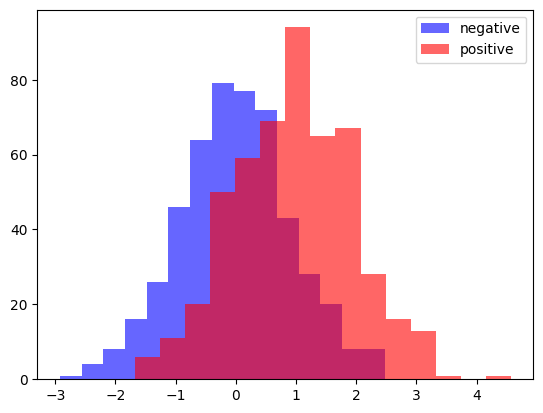

In [3]:
# scatter plot the samples
plt.hist(X[500:], bins=15, alpha=0.6, color="blue", label="negative")
plt.hist(X[:500], bins=15, alpha=0.6, color="red", label="positive")
plt.legend()
plt.show()

## Fit the model

In [4]:
# initialize the forest with 100 trees
est = HonestForestClassifier(
    n_estimators=100,
    max_samples=1.6,
    max_features=0.3,
    bootstrap=True,
    stratify=True,
    random_state=1,
)

# fit the model and obtain the tree posteriors
_, observe_proba = build_hyppo_oob_forest(est, X, y)

# generate forest posteriors for the two classes
observe_proba = np.nanmean(observe_proba, axis=0)

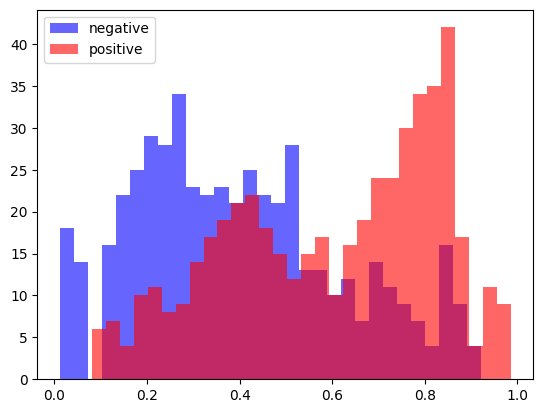

In [5]:
# scatter plot the posterior probabilities for class one
plt.hist(observe_proba[:500][:, 1], bins=30, alpha=0.6, color="blue", label="negative")
plt.hist(observe_proba[500:][:, 1], bins=30, alpha=0.6, color="red", label="positive")
plt.legend()
plt.show()

## Calculate the statistic

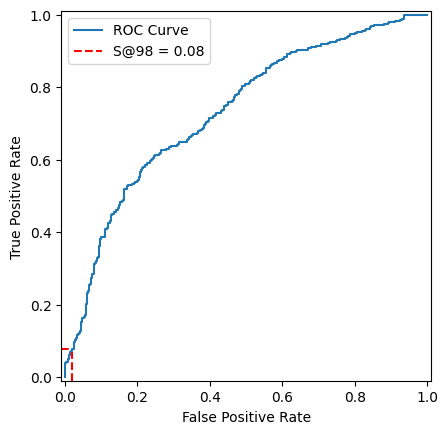

In [6]:
sa98 = Calculate_SA(y, observe_proba, max_fpr=0.02)